In [1]:
import pandas as pd
from pathlib import Path

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/sample_submission.csv
/kaggle/input/test.csv.zip
/kaggle/input/train.csv.zip
/kaggle/input/description.md
/kaggle/input/sample_submission.csv.zip
/kaggle/input/train.csv
/kaggle/input/test.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/description.md
/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv


In [3]:
## Transformer
!pip install transformers --quiet
!pip install datasets transformers[sentencepiece] --quiet
!pip install "transformers[sentencepiece]" --quiet


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
bigframes 2.8.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.31.0, but you have google-cloud-bigquery 3.25.0 which is incompatible.
bigframes 2.8.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


In [4]:
# import library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 
import time
import datetime


In [5]:
df = pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip')
test_csv = pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip')
test_csv_labels = pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip')
print(df.columns)
print(df.shape)
target_col= df.columns[2:]
feature_col= df.columns[1:2]
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip'

In [6]:
for col in target_col:
    print(f"The unique value for {col} are {df[col].unique()}")


NameError: name 'target_col' is not defined

In [7]:
for col in target_col:
    print(f"The unique value for {col} are {test_csv_labels[col].unique()}")


NameError: name 'target_col' is not defined

In [8]:
print(target_col)
print(feature_col)


NameError: name 'target_col' is not defined

In [9]:
df.dtypes


id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


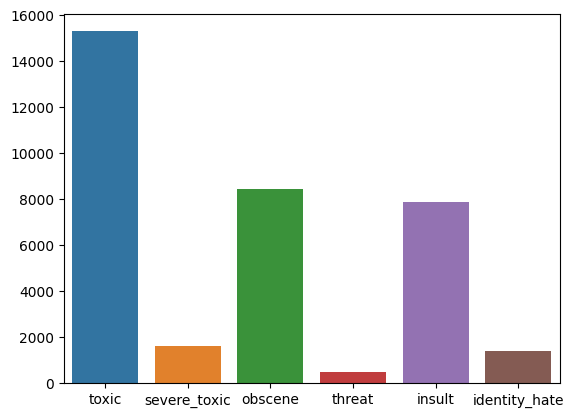

In [10]:
categories = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
sns.barplot(x=categories,y=df[categories].sum())
plt.show()


In [11]:
# Create "y" variable as binary target variable for at least one identification of class
condition = ((df["toxic"]==1) |
             (df["severe_toxic"]==1) |
             (df["obscene"]==1) |
             (df["threat"]==1) |
             (df["insult"]==1) |
             (df["identity_hate"]==1)
            )

df.loc[condition, "y"]=1
df.loc[~condition, "y"]=0
df["y"] = df["y"].astype(int)


In [12]:
agg_df = df["y"]\
    .value_counts(normalize=True)\
    .rename('Proportion')\
    .reset_index()
    
agg_df.columns = ["y", "Proportion"]


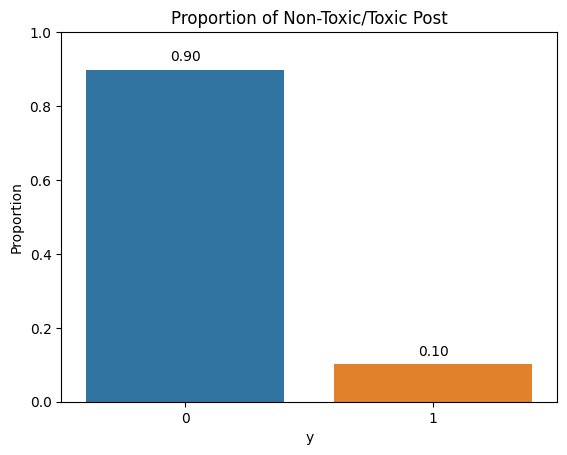

In [13]:
splot = sns.barplot(x="y", y='Proportion',data=agg_df)
plt.ylim(0,1)
plt.title("Proportion of Non-Toxic/Toxic Post")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


In [14]:
# Create variable to check on length
df['len'] = df["comment_text"].str.split().str.len()


Average length is 67.27352714465661 while max length is 1411.


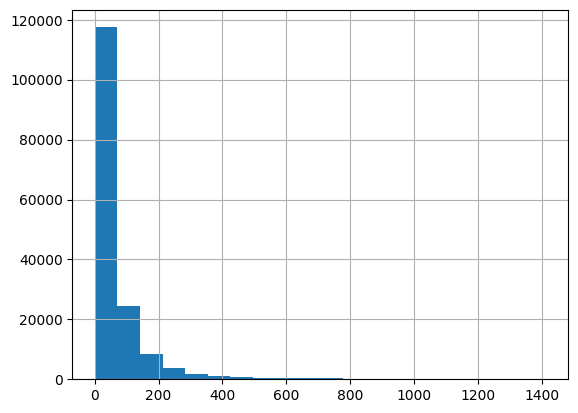

In [15]:
print(f"Average length is {df['len'].mean()} while max length is {df['len'].max()}.")
df['len'].hist(bins=20)
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='len', ylabel='Count'>

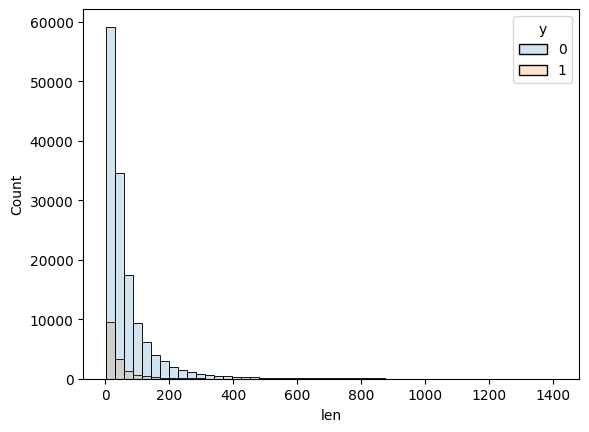

In [16]:
# Split the distribution chart by y = 1 or 0
sns.histplot(data=df, x="len", hue="y", bins=50, alpha=0.2)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='len', ylabel='Density'>

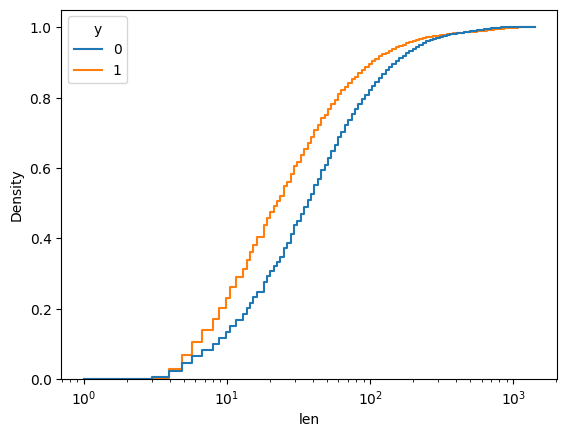

In [17]:
# Cumulative Distribution
sns.histplot(data=df, x="len", hue="y",
             log_scale=True, element="step", fill=False,
             cumulative=True, stat="density", common_norm=False)


In [18]:
df = df.rename(columns={"id": "idx"})


In [19]:
df.head()


,idx,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,y,len
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,43
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,17
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,42
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,113
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,13


In [20]:
# import pyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
# import other parts of transformers as well as tqdm
from transformers import (AutoTokenizer, AutoModel, 
                          AutoModelForSequenceClassification, 
                          DataCollatorWithPadding, AdamW, get_scheduler,
                          get_linear_schedule_with_warmup,
                          )
# import pyarrow (can only import this with GPU on kaggle notebook)
import pyarrow as pa
from tqdm.auto import tqdm
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import datasets
import random
from sklearn.metrics import classification_report


2025-08-18 13:54:51.008657: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755525291.021479       8 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755525291.025435       8 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-18 13:54:51.041438: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


ImportError: cannot import name 'AdamW' from 'transformers' (/usr/local/lib/python3.11/dist-packages/transformers/__init__.py)

In [21]:
# Setting up seed value
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value)


NameError: name 'random' is not defined

In [22]:
# train & validation, test split
train_val_df, test_df = train_test_split(df[["idx", "comment_text"] + categories], test_size=0.2, random_state=seed_value)


In [23]:
# train, validation split
train_df, val_df, = train_test_split(train_val_df[["idx", "comment_text"] + categories], test_size=0.25, random_state=seed_value)


In [24]:
print(f"Size of train, validation and test are {len(train_df)}, {len(val_df)}, {len(test_df)} respectively.")
print(f"Proportion of train, validation and test are {round(len(train_df)/len(df),2)}, {round(len(val_df)/len(df),2)}, {round(len(test_df)/len(df),2)} respectively.")


Size of train, validation and test are 95742, 31914, 31915 respectively.
Proportion of train, validation and test are 0.6, 0.2, 0.2 respectively.


In [25]:
train_df.reset_index(inplace=True)
train_df.drop("index", axis=1, inplace=True)

val_df.reset_index(inplace=True)
val_df.drop("index", axis=1, inplace=True)

test_df.reset_index(inplace=True)
test_df.drop("index", axis=1, inplace=True)


In [26]:
train_df.head()


,idx,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,f8514b48bbea9f52,"So when the polls close in Ontario at 9:30 pm,...",0,0,0,0,0,0
1,4c5e853732b4aa2d,from blowing up the Earth,0,0,0,0,0,0
2,097dc7f0c8a482a8,=fRENCH lANGUAGE\nThis is the National Library...,0,0,0,0,0,0
3,644c631403602fb9,Wiley Protocol \n\nKnow anything about bioiden...,0,0,0,0,0,0
4,ca98b70deab8bcfc,"""\n.\nNo, the facts are pretty clear. You chan...",0,0,0,0,0,0


In [27]:
# instantiate tokenizer, model using "bert-base-uncased"
# checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [28]:
# tokenize and encode sequences in the training set
train_tokens = tokenizer.batch_encode_plus(train_df["comment_text"].tolist(),
                                           max_length = 200,
                                           pad_to_max_length=True,
                                           truncation=True,
                                           return_token_type_ids=False
                                           )

# tokenize and encode sequences in the validation set
val_tokens = tokenizer.batch_encode_plus(val_df["comment_text"].tolist(),
                                         max_length = 200,
                                         pad_to_max_length=True,
                                         truncation=True,
                                         return_token_type_ids=False
                                         )

# tokenize and encode sequences in the test set
test_tokens = tokenizer.batch_encode_plus(test_df["comment_text"].tolist(),
                                          max_length = 200,
                                          pad_to_max_length=True,
                                          truncation=True,
                                          return_token_type_ids=False
                                          )


TypeError: PreTrainedTokenizerFast._batch_encode_plus() got an unexpected keyword argument 'pad_to_max_length'

In [29]:
## convert lists to tensors
train_seq = torch.tensor(train_tokens['input_ids'])
train_mask = torch.tensor(train_tokens['attention_mask'])
# change from a list of 1 & 0 to array then to tensor
train_y = torch.tensor(np.array(train_df[categories]))  

val_seq = torch.tensor(val_tokens['input_ids'])
val_mask = torch.tensor(val_tokens['attention_mask'])
# change from a list of 1 & 0 to array then to tensor
val_y = torch.tensor(np.array(val_df[categories]))

test_seq = torch.tensor(test_tokens['input_ids'])
test_mask = torch.tensor(test_tokens['attention_mask'])
# change from a list of 1 & 0 to array then to tensor
test_y = torch.tensor(np.array(test_df[categories]))


NameError: name 'train_tokens' is not defined

In [30]:
train_y


NameError: name 'train_y' is not defined

In [31]:
# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)
# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)
# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# wrap tensors
test_data = TensorDataset(test_seq, test_mask, test_y)
test_sampler = SequentialSampler(test_data)


NameError: name 'TensorDataset' is not defined

In [32]:
# define a batch size
batch_size = 32

# dataLoader for train set
train_dataloader = DataLoader(train_data, 
                              sampler=train_sampler, 
                              batch_size=batch_size,
                              # collate_fn=data_collator
                              )

# dataLoader for validation set
val_dataloader = DataLoader(val_data, 
                            sampler = val_sampler, 
                            batch_size=batch_size,
                            # collate_fn=data_collator
                            )


NameError: name 'DataLoader' is not defined

In [33]:
for step,batch in enumerate(train_dataloader):
    break
print(batch[0])
print(batch[1])
print(batch[2])


NameError: name 'train_dataloader' is not defined

In [34]:
# instantiate model using bert-base-uncased"
# Will be training for the whole network instead of just finetuning the weight of the head layer
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels = 6)

# In the event that we only need to finetune the head layer and not the whole network,
# just need to uncomment the below code

# for param in model.bert.parameters():
#     param.requires_grad = False

# for name, param in model.named_parameters():                
#     if param.requires_grad:
#         print(name)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [35]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [36]:
# Set up optimizer
# Will be training for the whole network instead of just finetuning the weight of the head layer
LEARN_RATE = 3e-5
optimizer = AdamW(model.parameters(),
                  lr = LEARN_RATE, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                  )

# In the event that we only need to finetune the head layer and not the whole network,
# just need to uncomment the below code

# optimizer = AdamW(filter(lambda p: p.requires_grad, model.parameters()),
#                   lr = LEARN_RATE, # args.learning_rate - default is 5e-5, our notebook had 2e-5
#                   eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
#                   )

# optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr = 1e-5)


NameError: name 'AdamW' is not defined

In [37]:
# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 3
epochs = 3

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # default value
                                            num_training_steps = total_steps
                                            )
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer)


NameError: name 'train_dataloader' is not defined

In [38]:
# Specify loss function
criterion = nn.BCEWithLogitsLoss()

# https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
# This criterion combines LogSoftmax and NLLLoss in one single class.
# More relevant for multiclass (because of the softmax)

# https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html
# More relevant for multilabel. For more explanation, can refer to the link below.
# https://discuss.pytorch.org/t/using-bcewithlogisloss-for-multi-label-classification/67011/2


In [39]:
# Specify measurement of accuracy
def accuracy_thresh(y_pred, y_true, thresh:float=0.4, sigmoid:bool=True):
    "Compute accuracy when `y_pred` and `y_true` are the same size."
    if sigmoid: 
        y_pred = y_pred.sigmoid()
    # return ((y_pred>thresh)==y_true.byte()).float().mean().item()
    return np.mean(((y_pred>thresh).float()==y_true.float()).float().cpu().numpy(), axis=1).sum()


In [40]:
def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [41]:
# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    # ========================================
    #               Training
    # ========================================
    # Perform one full pass over the training set.
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()
    # Reset the total loss & accuracy for this epoch.
    total_train_loss = 0
    total_train_accuracy = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):
        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        # As we unpack the batch, we'll also copy each tensor to the GPU using the `to` method.
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a backward pass. 
        # PyTorch doesn't do this automatically because accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments are given and what flags are set. 
        # For our useage here, it returns the loss (because we provided labels) and the "logits"--the model outputs prior to activation.
        output = model(b_input_ids, 
                       # token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       #labels=b_labels
                       )
        logits = output.logits
        loss = criterion(logits, b_labels.float())

        # Accumulate the training loss over all of the batches so that we can calculate the average loss at the end. 
        # `loss` is a Tensor containing a single value; the `.item()` function just returns the Python value from the tensor.
        total_train_loss += loss.item()
        
        # Calculate the accuracy for this batch of test sentences, and accumulate it over all batches.
        total_train_accuracy += accuracy_thresh(logits,b_labels.float())

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Report the final accuracy for this validation run.
    # avg_train_accuracy = total_train_accuracy / len(train_dataloader)
    # print("  Accuracy: {0:.5f}".format(avg_train_accuracy))
    train_accuracy = total_train_accuracy / len(train_df)
    print("  Accuracy: {0:.5f}".format(train_accuracy))
    
    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in val_dataloader:
        
        # Unpack this training batch from our dataloader. 
        # As we unpack the batch, we'll also copy each tensor to the GPU using the `to` method.
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output values prior to applying an activation function like the softmax.
            output = model(b_input_ids, 
                           # token_type_ids=None, 
                           attention_mask=b_input_mask, 
                           # labels=b_labels
                           )
            
            logits = output.logits
            loss = criterion(logits, b_labels.float())
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()
        
        # Calculate the accuracy for this batch of test sentences, and accumulate it over all batches.
        total_eval_accuracy += accuracy_thresh(logits,b_labels.float())

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy() # maybe irrelevant over here
        label_ids = b_labels.to('cpu').numpy() # maybe irrelevant over here

    # Report the final accuracy for this validation run.
    # avg_val_accuracy = total_eval_accuracy / len(val_dataloader)
    # print("  Accuracy: {0:.5f}".format(avg_val_accuracy))
    val_accuracy = total_eval_accuracy / len(val_df)
    print("  Accuracy: {0:.5f}".format(val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(val_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            # 'Training Accur': avg_train_accuracy,
            # 'Valid. Accur.': avg_val_accuracy,
            'Training Accur': train_accuracy,
            'Valid. Accur.': val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))



======== Epoch 1 / 3 ========
Training...


NameError: name 'train_dataloader' is not defined

In [42]:
# Display floats with two decimal places.
pd.set_option('precision', 5)
# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)
# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')
# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])
# Display the table.
df_stats


OptionError: Pattern matched multiple keys

In [43]:
# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()


NameError: name 'df_stats' is not defined

In [44]:
# Plot the accuracy curve.
plt.plot(df_stats['Training Accur'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Accur.'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()


NameError: name 'df_stats' is not defined

In [45]:
# get predictions for test data
thresh = 0.4
with torch.no_grad():
    outputs = model(test_seq[0:1000].to(device), test_mask[0:1000].to(device))
    pred_probs = torch.sigmoid(outputs.logits)
    pred_probs = pred_probs.cpu().detach().numpy()


NameError: name 'test_seq' is not defined

In [46]:
pred_probs


NameError: name 'pred_probs' is not defined

In [47]:
y_pred = (pred_probs > thresh).astype(int)


NameError: name 'pred_probs' is not defined

In [48]:
y_pred


NameError: name 'y_pred' is not defined

In [49]:
y_true = np.array(test_df[categories])[0:1000]


In [50]:
from sklearn.metrics import hamming_loss, accuracy_score


In [51]:
def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    '''
    Compute the Hamming score (a.k.a. label-based accuracy) for the multi-label case
    http://stackoverflow.com/q/32239577/395857
    
    Take in np.array for y_true and y_pred. E.g.
    y_true = np.array([[0,1,0],
                       [0,1,1],
                       [1,0,1],
                       [0,0,1]])

    y_pred = np.array([[0,1,1],
                       [0,1,1],
                       [0,1,0],
                       [0,0,0]])
    '''
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        #print('\nset_true: {0}'.format(set_true))
        #print('set_pred: {0}'.format(set_pred))
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        #print('tmp_a: {0}'.format(tmp_a))
        acc_list.append(tmp_a)
    return np.mean(acc_list)


In [52]:
print("accuracy_score:", accuracy_score(y_true, y_pred))
print("Hamming_score:", hamming_score(y_true, y_pred))
print("Hamming_loss:", hamming_loss(y_true, y_pred))


NameError: name 'y_pred' is not defined

In [53]:
PATH = "./toxic_distilBERT_multilabel"
torch.save(model.state_dict(), PATH)


In [54]:
test_csv.head()


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [55]:
len(test_csv)


153164

In [56]:
# tokenize and encode sequences in the actual test set
sub_tokens = tokenizer.batch_encode_plus(test_csv["comment_text"].tolist(),
                                         max_length = 200,
                                         pad_to_max_length=True,
                                         truncation=True,
                                         return_token_type_ids=False
                                         )


TypeError: PreTrainedTokenizerFast._batch_encode_plus() got an unexpected keyword argument 'pad_to_max_length'

In [57]:
sub_seq = torch.tensor(sub_tokens['input_ids'])
sub_mask = torch.tensor(sub_tokens['attention_mask'])


NameError: name 'sub_tokens' is not defined

In [58]:
sub_data = TensorDataset(sub_seq, sub_mask)


NameError: name 'TensorDataset' is not defined

In [59]:
# dataLoader for validation set
sub_dataloader = DataLoader(sub_data, 
                            batch_size=batch_size)


NameError: name 'DataLoader' is not defined

In [60]:
# Measure how long the evaluation going to takes.
t0 = time.time()

for step, batch in enumerate(sub_dataloader):
    # Progress update every 40 batches.
    if step % 40 == 0 and not step == 0:
        # Calculate elapsed time in minutes.
        elapsed = format_time(time.time() - t0)
        # Report progress.
        print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(sub_dataloader), elapsed))
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    with torch.no_grad():
        outputs = model(b_input_ids, b_input_mask)
        pred_probs = torch.sigmoid(outputs.logits)
        if step == 0:
            predictions = pred_probs.cpu().detach().numpy()
        else:
            predictions = np.append(predictions, pred_probs.cpu().detach().numpy(), axis=0)


NameError: name 'sub_dataloader' is not defined

In [61]:
predictions_df = pd.DataFrame(predictions, columns = categories)


NameError: name 'predictions' is not defined

In [62]:
len(predictions_df)


NameError: name 'predictions_df' is not defined

In [63]:
submission = pd.concat([test_csv["id"], predictions_df], axis=1)


NameError: name 'predictions_df' is not defined

In [64]:
submission.head()


NameError: name 'submission' is not defined

In [65]:
submission.to_csv('submission.csv', index=False, header=True)


NameError: name 'submission' is not defined